# Handling the missing data

- fillna
- dropna

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets/weather_data_nan.csv')

df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [5]:
df.isnull().sum()

day            0
temperature    4
windspeed      4
event          2
dtype: int64

In [7]:
df['temperature'].fillna(100)

0     32.0
1    100.0
2     28.0
3    100.0
4     32.0
5    100.0
6    100.0
7     34.0
8     40.0
Name: temperature, dtype: float64

In [9]:
df.fillna(100)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,100.0,9.0,Sunny
2,1/5/2017,28.0,100.0,Snow
3,1/6/2017,100.0,7.0,100
4,1/7/2017,32.0,100.0,Rain
5,1/8/2017,100.0,100.0,Sunny
6,1/9/2017,100.0,100.0,100
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [13]:
df.fillna({'temperature' : 100 ,
          'windspeed' : 200 , 
          'event' : 'no event'})

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,100.0,9.0,Sunny
2,1/5/2017,28.0,200.0,Snow
3,1/6/2017,100.0,7.0,no event
4,1/7/2017,32.0,200.0,Rain
5,1/8/2017,100.0,200.0,Sunny
6,1/9/2017,100.0,200.0,no event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [23]:
# temperature --> mean

# windspeed --> median

# event ---> mode

df.fillna({'temperature' : df['temperature'].mean() ,
          'windspeed' : df['windspeed'].median() , 
          'event' : df['event'].mode()[0]})

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,33.2,9.0,Sunny
2,1/5/2017,28.0,8.0,Snow
3,1/6/2017,33.2,7.0,Sunny
4,1/7/2017,32.0,8.0,Rain
5,1/8/2017,33.2,8.0,Sunny
6,1/9/2017,33.2,8.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [16]:
df['temperature'].mean()

33.2

In [18]:
df['windspeed'].median()

8.0

In [28]:
df['event'].mode()[0]

'Sunny'

In [21]:
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


# Replace

In [29]:
df = pd.read_csv('datasets/weather_data_replace.csv')

df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [30]:
df.isnull().sum()

day            0
temperature    0
windspeed      0
event          0
dtype: int64

In [32]:
df.replace(-99999 , 100)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,100,7,Sunny
2,1/3/2017,28,100,Snow
3,1/4/2017,100,7,0
4,1/5/2017,32,100,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [33]:
df.replace([-99999 , '0'] , 100)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,100,7,Sunny
2,1/3/2017,28,100,Snow
3,1/4/2017,100,7,100
4,1/5/2017,32,100,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,100


In [36]:
df.replace({'temperature' : -99999 	,
           'windspeed' : 7 , 
           'event' : '0'} , 100)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,100,100,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,100,100,100
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,100


In [37]:
df.replace({'temperature' : -99999 	,
           'windspeed' : 7 , 
           'event' : '0'} , {'temperature' : 100 	,
           'windspeed' : 200 , 
           'event' : 300})

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,100,200,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,100,200,300
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,300


In [40]:
df.replace([-99999,7, '0'],[10,-1,'Not available'])


,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,10,-1,Sunny
2,1/3/2017,28,10,Snow
3,1/4/2017,10,-1,Not available
4,1/5/2017,32,10,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,Not available


In [42]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [44]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [45]:
df['event'].unique()

array(['Rain', 'Sunny', 'Snow', '0'], dtype=object)

In [47]:
df['event'].value_counts()

event
Rain     2
Sunny    2
0        2
Snow     1
Name: count, dtype: int64

In [50]:
dict.fromkeys(df.columns)

{'day': None, 'temperature': None, 'windspeed': None, 'event': None}

In [51]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [60]:
for i in range(len(df['temperature'])):
    if (df['temperature'][i]) == -99999:
        print(df['temperature'][i-1])
        continue

    print(df['temperature'][i])

32
32
28
28
32
31
34


# Group by

- groupby
- getgroup

In [61]:
df = pd.read_csv('datasets/weather_by_cities_group_by.csv')

df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [62]:
df['city'].unique()

array(['new york', 'mumbai', 'paris'], dtype=object)

In [63]:
df['event'].unique()

array(['Rain', 'Sunny', 'Snow', 'Fog', 'Cloudy'], dtype=object)

In [64]:
df['event'].value_counts()

event
Sunny     4
Cloudy    3
Rain      2
Fog       2
Snow      1
Name: count, dtype: int64

In [66]:
df['temperature'].max()

92

In [70]:
g = df.groupby('city')

list(g)

[('mumbai',
          day    city  temperature  windspeed  event
  4  1/1/2017  mumbai           90          5  Sunny
  5  1/2/2017  mumbai           85         12    Fog
  6  1/3/2017  mumbai           87         15    Fog
  7  1/4/2017  mumbai           92          5   Rain),
 ('new york',
          day      city  temperature  windspeed  event
  0  1/1/2017  new york           32          6   Rain
  1  1/2/2017  new york           36          7  Sunny
  2  1/3/2017  new york           28         12   Snow
  3  1/4/2017  new york           33          7  Sunny),
 ('paris',
           day   city  temperature  windspeed   event
  8   1/1/2017  paris           45         20   Sunny
  9   1/2/2017  paris           50         13  Cloudy
  10  1/3/2017  paris           54          8  Cloudy
  11  1/4/2017  paris           42         10  Cloudy)]

In [73]:
g.max()['temperature']

city
mumbai      92
new york    36
paris       54
Name: temperature, dtype: int64

In [77]:
g.mean(numeric_only = True)['windspeed']

city
mumbai       9.25
new york     8.00
paris       12.75
Name: windspeed, dtype: float64

In [76]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [79]:
import seaborn as sns

df = sns.load_dataset('titanic')

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [83]:
(df.isnull().sum() /len(df)) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [84]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [85]:
list(g)

[('mumbai',
          day    city  temperature  windspeed  event
  4  1/1/2017  mumbai           90          5  Sunny
  5  1/2/2017  mumbai           85         12    Fog
  6  1/3/2017  mumbai           87         15    Fog
  7  1/4/2017  mumbai           92          5   Rain),
 ('new york',
          day      city  temperature  windspeed  event
  0  1/1/2017  new york           32          6   Rain
  1  1/2/2017  new york           36          7  Sunny
  2  1/3/2017  new york           28         12   Snow
  3  1/4/2017  new york           33          7  Sunny),
 ('paris',
           day   city  temperature  windspeed   event
  8   1/1/2017  paris           45         20   Sunny
  9   1/2/2017  paris           50         13  Cloudy
  10  1/3/2017  paris           54          8  Cloudy
  11  1/4/2017  paris           42         10  Cloudy)]

In [86]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


In [87]:
g.get_group('paris')

,day,city,temperature,windspeed,event
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy
10,1/3/2017,paris,54,8,Cloudy
11,1/4/2017,paris,42,10,Cloudy


In [88]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [90]:
g = df.groupby('sex')

list(g)

[('female',
       survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
  1           1       1  female  38.0      1      0  71.2833        C   First   
  2           1       3  female  26.0      0      0   7.9250        S   Third   
  3           1       1  female  35.0      1      0  53.1000        S   First   
  8           1       3  female  27.0      0      2  11.1333        S   Third   
  9           1       2  female  14.0      1      0  30.0708        C  Second   
  ..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
  880         1       2  female  25.0      0      1  26.0000        S  Second   
  882         0       3  female  22.0      0      0  10.5167        S   Third   
  885         0       3  female  39.0      0      5  29.1250        Q   Third   
  887         1       1  female  19.0      0      0  30.0000        S   First   
  888         0       3  female   NaN      1      2  23.4500        S   Third   
  
         who 

In [92]:
g.sum(numeric_only = True)['survived']

sex
female    233
male      109
Name: survived, dtype: int64

In [94]:
g.count()['survived']

sex
female    314
male      577
Name: survived, dtype: int64

In [95]:
(g.sum(numeric_only = True)['survived'] / g.count()['survived']) * 100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

<Axes: xlabel='sex', ylabel='survived'>

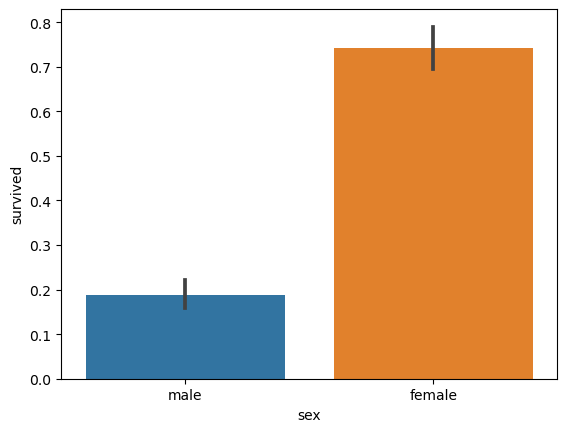

In [98]:
sns.barplot(x = 'sex' , y ='survived' , data = df)

In [96]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Matplotlib & Seaborn